Le support Vector Machine (SVM) est une méthode d'apprentissage supervisé qui est utilisé pour résoudre les problèmes de classification binaire ou multiclassifiées.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialisation des poids et du biais à zéro
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Entraînement du modèle à l'aide de l'algorithme de descente de gradient
        for epoch in range(self.num_epochs):
            # Calcul de la perte (Hinge loss) et du gradient
            loss, dw, db = self.hinge_loss_gradient(X, y)
            
            # Mise à jour des poids et du biais avec le gradient descend
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Affichage de la perte toutes les 100 itérations
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
    
    def hinge_loss_gradient(self, X, y):
        n_samples = X.shape[0]
        
        # Calcul de la perte Hinge loss
        distances = 1 - y * (np.dot(X, self.weights) + self.bias)
        loss = np.maximum(0, distances).mean() + self.lambda_param * np.dot(self.weights, self.weights)
        
        # Calcul du gradient de la perte Hinge loss
        mask = (distances >= 0).astype(int)
        dw = -np.dot(X.T, y * mask) / n_samples + 2 * self.lambda_param * self.weights
        db = -np.sum(y * mask) / n_samples
        
        return loss, dw, db
    
    def predict(self, X):
        # Prédiction de la classe
        return np.sign(np.dot(X, self.weights) + self.bias)
    
# Affichage de la frontière de décision
def plot_decision_boundary(clf, X, y):
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, alpha=0.3, s=X[:,1]*100)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Création de la grille pour évaluer le modèle
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Affichage de la frontière de décision
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='blue', levels=[0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

FONCTION POUR LA VISUALISATION

DATASETS

In [95]:
# Chargement du jeu de données Iris
iris = datasets.load_iris()
X = iris.data[:100, :2]  # On utilise seulement les deux premières caractéristiques pour faciliter la visualisation
y = iris.target[:100]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test = X[:75], X[75:]
y_train, y_test = y[:75], y[75:]

VISUALISATION DU DATASETS

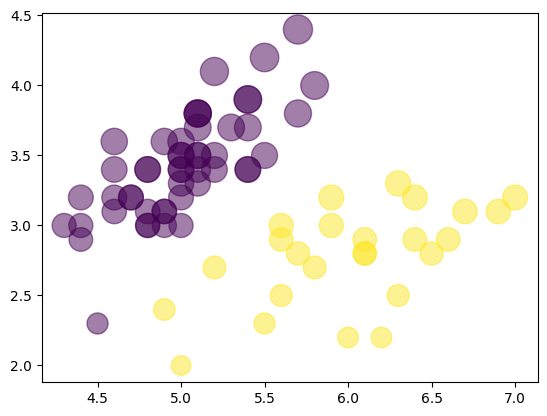

In [96]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.5, s=X_train[:,1]*100)

ENTRAINNEMENT DU MODELE SUR LE DATASETS

In [97]:
# Création et entraînement du modèle SVM linéaire
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, num_epochs=1000)
svm.fit(X_train, y_train)

Epoch 0, Loss: 1.0
Epoch 100, Loss: 0.6700530031328272
Epoch 200, Loss: 0.6672008253683778
Epoch 300, Loss: 0.6669932002212982
Epoch 400, Loss: 0.6669931901623409
Epoch 500, Loss: 0.6669929210746144
Epoch 600, Loss: 0.6669929112061541
Epoch 700, Loss: 0.666992901436432
Epoch 800, Loss: 0.6669928917704043
Epoch 900, Loss: 0.6669928822078405


EVALUATION DU MODELE

In [98]:
# Prédictions sur l'ensemble de test
predictions = svm.predict(X_test)

# Calcul de la précision du modèle
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


VISUALISATION DU MODELE

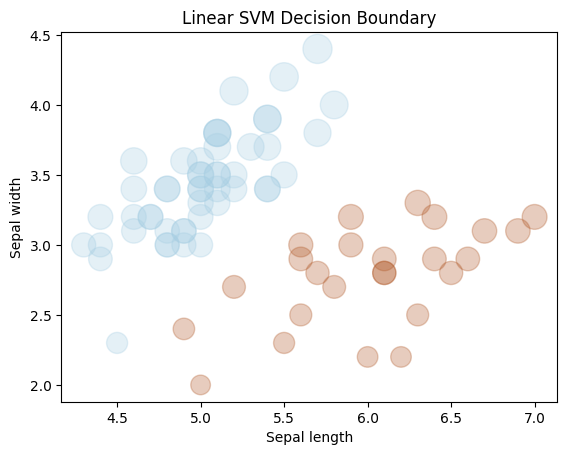

In [116]:
plot_decision_boundary(svm, X_train, y_train)